In [1]:
WORKSPACEFOLDER = 'D:\Projects\ComplexNetwork'
import os
os.chdir(WORKSPACEFOLDER)

In [2]:
import json

import torch

import config

In [3]:
DB = config.get_DB()

In [4]:
import matplotlib.pyplot as plt

# SNAPTwitter

-   cn20
-   beta=0.0120

In [5]:
with open(os.path.join(DB, 'SNAPTwitter/nodes_degree_approx_20.json'), 'r') as f:
    nodes = json.load(f)
with open(os.path.join(DB, 'SNAPTwitter/SNAPTwitter.node2vec.emb.json'), 'r') as f:
    node_emb = json.load(f)
with open(os.path.join(DB, 'SNAPTwitter/p_gin_beta0.0120.json'), 'r') as f:
    p_gins = json.load(f)

In [6]:
import src.main.util.nn.sample as sample
import src.main.util.nn.training as training
import src.main.model.nn.custom_module as custom_module

In [9]:
samples = sample.get_samples_order_independent_net(nodes, node_emb, p_gins, 0.04)

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


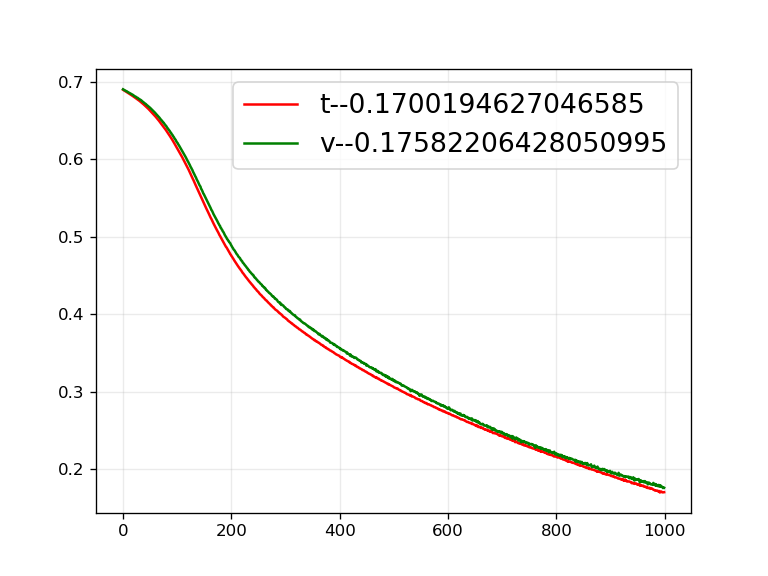

In [11]:
fig, ax = plt.subplots()

In [12]:
conf = training.Conf()
conf.model = custom_module.OrderIndependentNet
conf.loss_fn = torch.nn.NLLLoss()
model = training.classify(samples, 2, conf, ax)
torch.cuda.empty_cache()

training hit rate -->  0.94923858,          validation hit rate -->  0.93548387
